**Question 1**.

**Complete Mathematical Derivation for the Logistic Regression Objective**

We aim to minimize the following loss function for binary classification problems:
$$
-\sum_{i=1}^n \left( y_i \log \hat{y}_i + (1-y_i) \log (1-\hat{y}_i) \right)
$$
where $\hat{y}_i = s(x_i^\top w)$ and $s(\cdot)$ is shorthand for the sigmoid function. This loss is known as the cross-entropy loss.

**Derive this loss function using Maximum Likelihood Estimation (MLE):**

Step 1. Choose a probability distribution to model the binary random variable. A natural choice is the Bernoulli distribution:
$$
P(y|x) = \mu(x)^y (1-\mu(x))^{(1-y)}
$$
where $\mu(x)$ is the conditional mean $E[Y|x]$.


Step 2. Specify/parameterize the function $\mu(x)$ by using the training parameter $w$: $\mu(x; w) = E[Y|x] = sigmoid(x^\top w) = \frac{1}{1+e^{-x^\top w}}$. (In contrast, in linear regression we simply define $E[Y|x]=x^\top w$).

$$
P(y|x) = \mu(x)^y (1-\mu(x))^{(1-y)} \\
\mu(x; w) = sigmoid(x^\top w) \\

P(y|x) = sigmoid(x^\top w)^y (1-sigmoid(x^\top w)))^{(1-y)} \\

log(P(y|x)) = log(sigmoid(x^\top w)^y (1-sigmoid(x^\top w)))^{(1-y)}) \\
= y*log(sigmoid(x^\top w)) + (1-y)*log((1-sigmoid(x^\top w))) \\
= -\sum_{i=1}^n \left( y_i \log s(x_i^\top w) + (1-y_i) \log (1-s(x_i^\top w)) \right) \\
= -\sum_{i=1}^n \left( y_i \log \hat{y}_i + (1-y_i) \log (1-\hat{y}_i) \right) \\
$$

**Optimizing this Objective. You may proceed to the next question after reading this.**

Recall how gradient descent operates. To minimize a loss function $ c(w) $, you repeatedly update $ w $ using the rule:
$$
w \gets w - \alpha \nabla c(w)
$$
where $ \alpha $ is the learning rate, until the sequence converges.

Returning to the previous discussion on the cross-entropy loss for binary classification: could you compute the gradient by yourself? This is optional.

The correct expression for the gradient over the entire dataset (X, Y) is:
$$
X^\top (s(Xw) - Y)
$$

**Question 2.**

Expectation: A working solution where the learned class label using Logistic Regression is similar to the training class label. You only need to add code at those TODOs.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def plotClass(X,y,p):
    plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)

    plt.show()

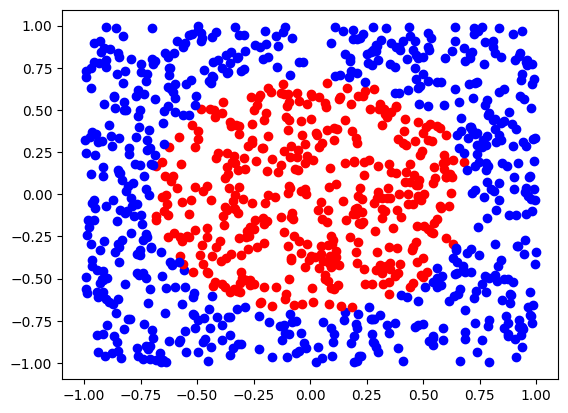

(2, 1000)
(1, 1000)


In [12]:
num_data=1000 # data points per class

X=np.random.uniform(-1,1,[2,num_data])
y=X[0,:]**2+X[1,:]**2-0.5>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

In [13]:
X = X.T
y = y.T

In [14]:
import math

def sigmoid(z):
  return 1/(1+np.exp(-z))

# TODO: define the loss function here
# eps is a smooth parameter that should be added to log function to avoid zero
def loss(yhat, y):
  eps = 1e-10
  lst = []
  for i in range(len(X)):
    lst.append(y[i]*math.log(yhat[i]+eps) + (1-y[i])*math.log(1-yhat[i]+eps))
  summ = -sum(lst)
  return summ

In [15]:
# this block of code is similar to linear regression setting where we simply add polynomial features to make the feature more powerful
M = 3
Xbig = []
for i in range(M+1):
  for j in range(M+1):
    Xbig.append(X[:,0]**i * X[:, 1]**j)
Xbig = np.array(Xbig).T

In [16]:
Xbig.shape

(1000, 16)

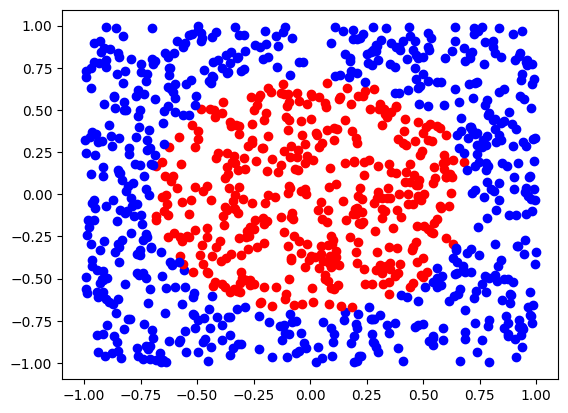

<Figure size 640x480 with 0 Axes>

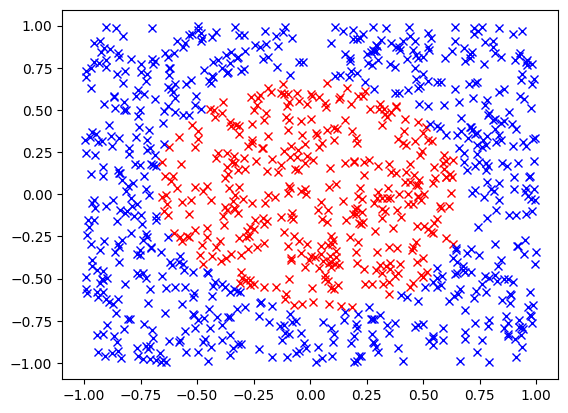

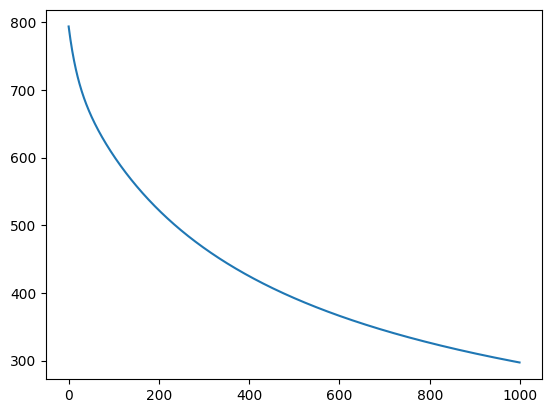

In [17]:
# w is theta
w = np.random.randn(Xbig.shape[1], 1)
lr = 0.0001

ls = []
for i in range(1000):
  # TODO: compute yhat here
  yhat = sigmoid(Xbig@w)
  l = loss(yhat, y)

  # TODO: this is the gradient
  dw = Xbig.T@(sigmoid(Xbig@w)-y)                       # given above in optional part

  # TODO: update the w here with learning rate lr
  w -= lr*dw

  # the ls list is used to record the loss at each iteration
  ls.append(l)


plotClass(X.T, y.T, 'o')
plt.figure()

# TODO: get the boolean vector where true indicate class one
# you can simply set the probability threshold to 0.5
boolvec = yhat >= 0.5
plotClass(X.T, boolvec.T, 'x')

plt.figure()
plt.plot(ls)

**Question 3** **(this can be done on Th or Friday after the optimization lecture)** Do you think we can minimize the following loss function for binary classification problems:
$\frac{1}{n}\sum_{i=1}^n (y_i -\hat{y}_i)^2$ where $\hat{y_i} = s(x_i^\top w)$ where $s()$ is shorthand of $sigmoid$. What could be the pros and/or cons? Could you guess a reason? **No math derivation is needed.**

The loss function above is the mean-squared error.

It's gradient is:

$
\nabla_w{L} = \frac{1}{N}{X^T(\hat y-y)}
$

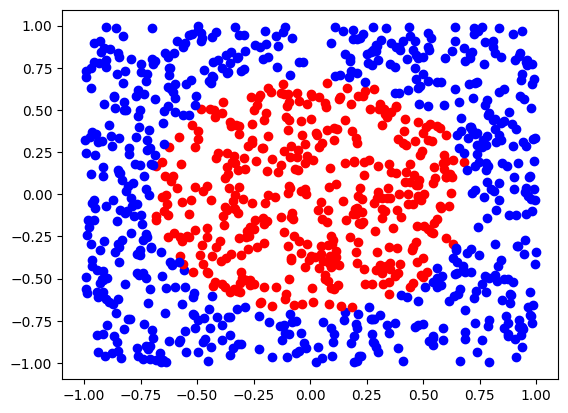

<Figure size 640x480 with 0 Axes>

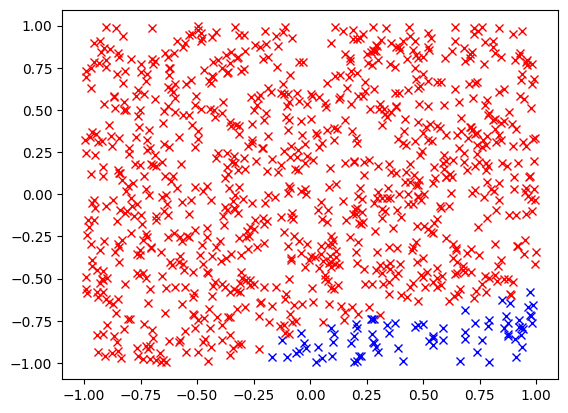

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
# this block of code uses the same dataset as above
# w is theat
w = np.random.randn(Xbig.shape[1], 1)
lr = 0.0001

ls = []
for i in range(1000):
  yhat = sigmoid(Xbig@w)
  
  # TODO: this is the gradient
  dw = Xbig.T@(yhat-y)/Xbig.shape[0]

  # TODO: update the w here with learning rate lr
  w -= lr*dw

  l = loss(yhat, y)
  # the ls list is used to record the loss at each iteration
  ls.append(l)

yhat = sigmoid(Xbig@w)
plotClass(X.T, y.T, 'o')
plt.figure()
plotClass(X.T, (yhat.T>0.5), 'x')

plt.figure()